<a href="https://colab.research.google.com/github/mysticgrud/compsci/blob/main/%D7%A2%D7%95%D7%AA%D7%A7_%D7%A9%D7%9C_%D7%9E%D7%93%D7%9E%D7%97_%D7%A2%D7%91%D7%95%D7%93%D7%94_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyter nbconvert --to pdf "/data/KNN.ipynb"

[NbConvertApp] WARNING | pattern '/data/KNN.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    E

<div dir="rtl" align="center">
<font color='#F33480' size="8">
<b>
חיזוי מוות של מטופל לאחר התקף לב
</b>
</font>
</div>

<div dir="rtl" align="center">
<font color='#F33480' size="3">
<b>
10/6/2024
</b>
</font>
</div>


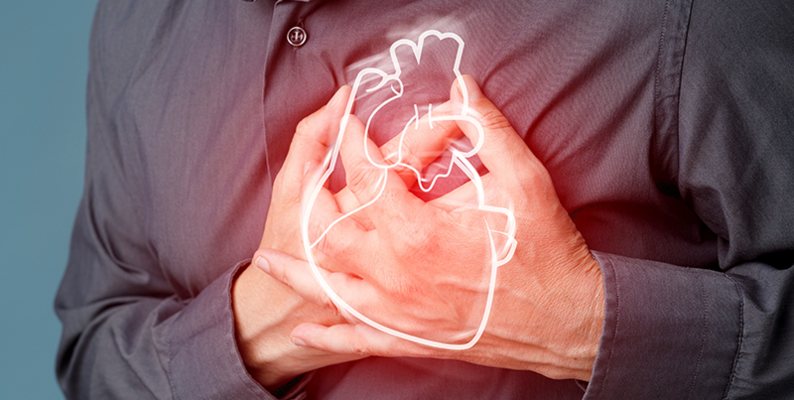

**קישור לקולאב**
https://colab.research.google.com/drive/1eXxo_bE32AyxaPjpk2B0x2DmOlQB6hj8?usp=sharing

**מטרת המחקר**
 * חיזוי מוות אצל מטופלים שעברו התקף לב

# **תיאור נתונים**


*   הנתונים נמצאו באתר קאגל
*   הנתונים נאספו על ידי שני אנשים בשם דויד צ'יקו וג'וזפה יורמה
*   הנתונים נאספו ב BMC אינפורמטיקה רפואית וקבלת החלטות 20, 16
*   הנתונים נאספו שנה 2020





**✨הסבר על עמודות✨**

*   Age: גיל המטופל
*   Anaemia:  יש או אין אנמייה (מחסור בתאי דם אדומים או המוגלובין)
  
  Yes: 1 No: 0

* High blood pressure: אם למטופל יש יתר לחץ דם

  Yes: 1 No: 0
* Creatinine phosphokinase: רמת האנזים CPK בדם. אנזים חשיבות רבה ביצירת אנרגיה בשריר.
* Diabetes: אם למטופל יש סכרת

  Yes: 1 No: 0
* Ejection fraction: אחוז הדם היוצא מהלב בכל התכווצות.
* Sex: גבר או אישה

  Male: 1 Female: 0
* Platelets: טסיות דם בדם
* Serum creatinine: רמת קריאטינין בדם (קריאטינין הוא תוצר לוואי של חילוף
החומרים ברקמת השריר. הוא נוצר מקראטין - מולקולה שיש לה תפקיד חשוב בתהליך הייצור של האנרגיה בשריר.)
* Serum sodium: רמת נתרן בדם
* Smoking: אם החולה מעשן

  Yes: 1 No: 0
* Time: תקופת מעקב
* DEATH_EVENT: אם המטופל נפטר במהלך תקופת המעקב

  Yes: 1 No: 0

https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure?resource=download

# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#התקנת ספרייה שתעזור לי לראות במה הכי כדאי לי להשתמש
!pip install lazypredict
!pip install scipy==1.7.1

ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.7.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1, 1.11.0rc1, 1.11.0rc2, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.13.1, 1.14.0rc1, 1.14.0rc2)
ERROR: No matching distribution found for scipy==1.7.1


# importing data

In [ ]:
#טעינת נתונים
df = pd.read_csv('https://drive.google.com/uc?id=1WcVJ6BmE_iFB5gErNCBwvOP-pBUa5tsc')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


# Data presentation and description/cleaning

In [ ]:
df.shape

(299, 13)

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#מוחקת את כל השורות עם ערכים חסרים כיוון שזה מעט מאוד שורות
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [ ]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [ ]:
#סטנדרדיזציה של העמודה של הטסיות שיהיה יותר קל לעבוד איתם
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['platelets'] = ss.fit_transform(df[['platelets']])

# Visualiztion of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


טבלת קורלאציה בין ערכים

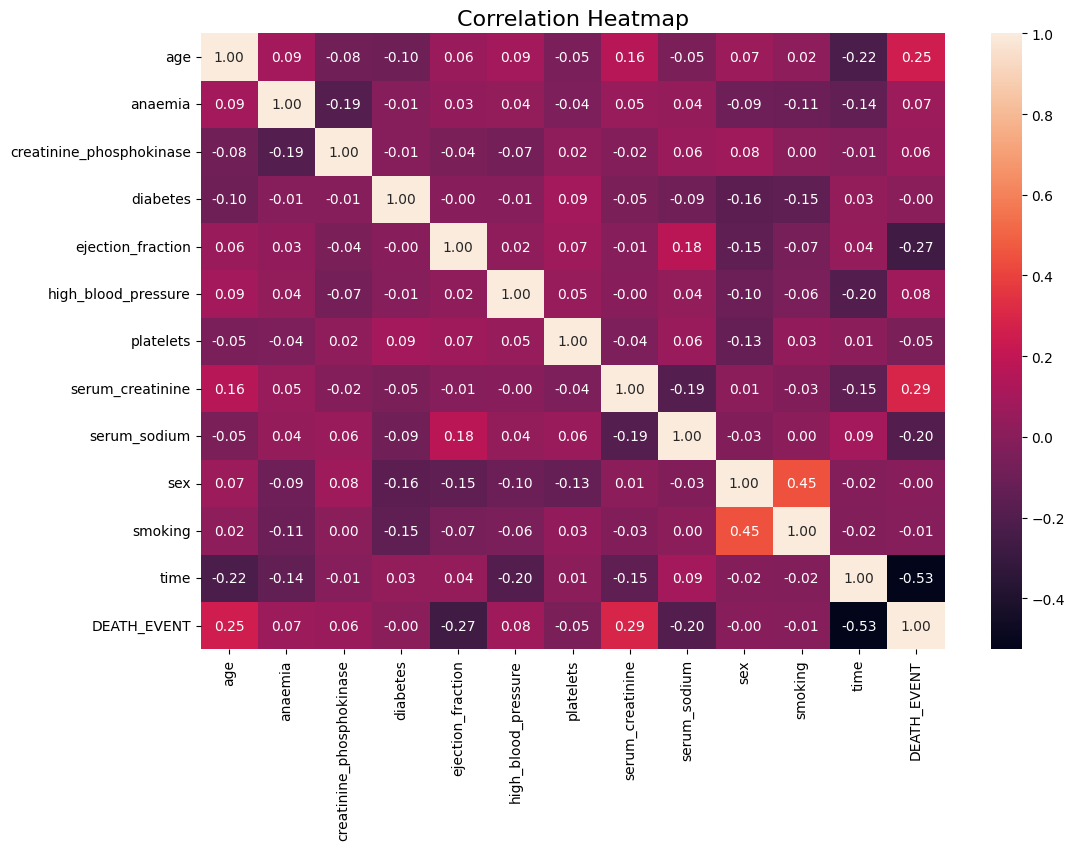

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
#fmt=".2f" formats the annotations to two decimal places.
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


מראה את המוות לפי הגיל, ניתן לראות שהכי הרבה מתו בין 60-65

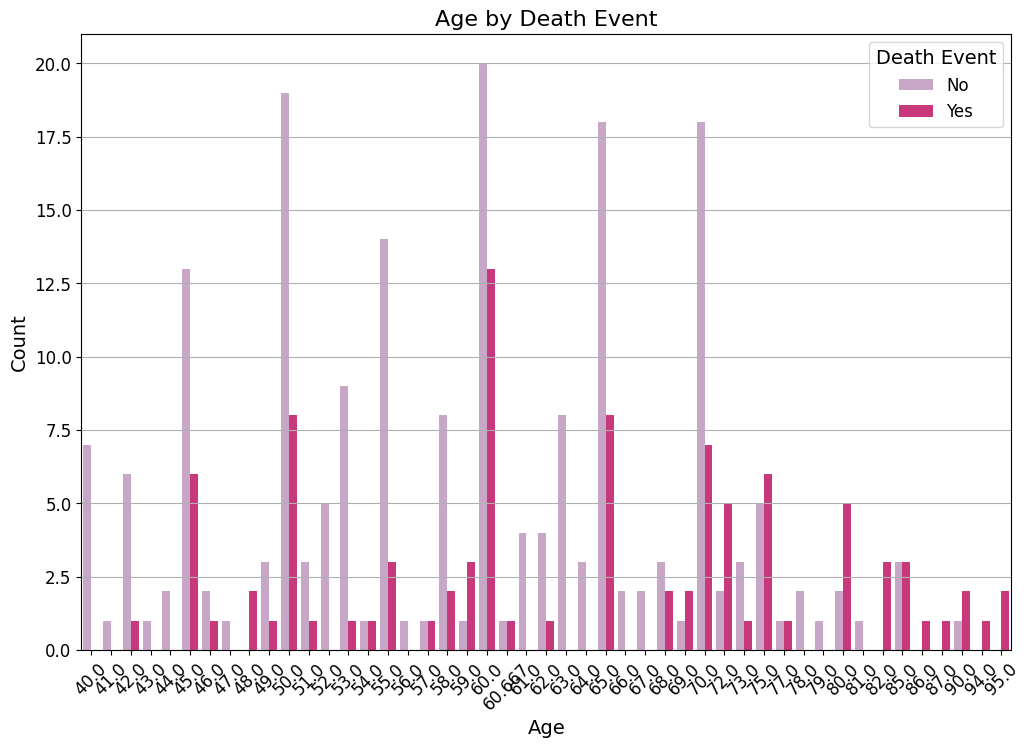

In [ ]:
bins = pd.cut(df['age'], bins=range(40, 95, 5))
df['age_group'] = bins

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="age", hue="DEATH_EVENT", palette='PuRd')
plt.title("Age by Death Event", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Death Event", labels=["No", "Yes"], fontsize=12, title_fontsize=14)
plt.grid(axis='y')

plt.show()

מראה מוות לפי קבוצת גיל

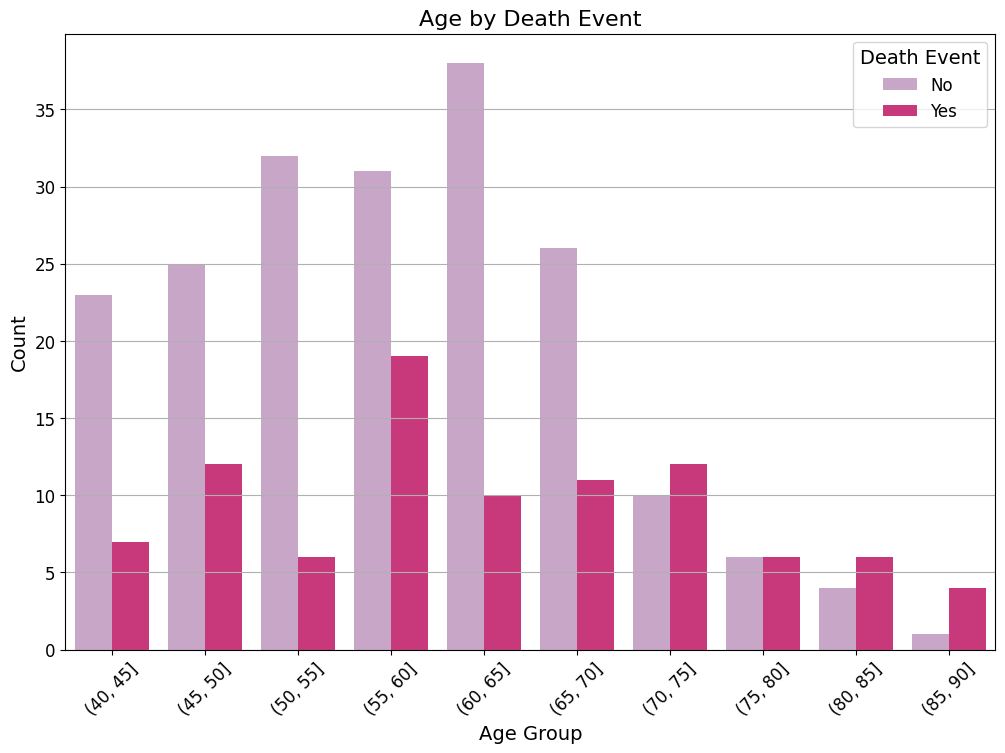

In [ ]:
bins = pd.cut(df['age'], bins=range(40, 95, 5))
df['age_group'] = bins

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="age_group", hue="DEATH_EVENT", palette='PuRd')
plt.title("Age by Death Event", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Death Event", labels=["No", "Yes"], fontsize=12, title_fontsize=14)
plt.grid(axis='y')

plt.show()

מראה את התווחים של כל הנתונים

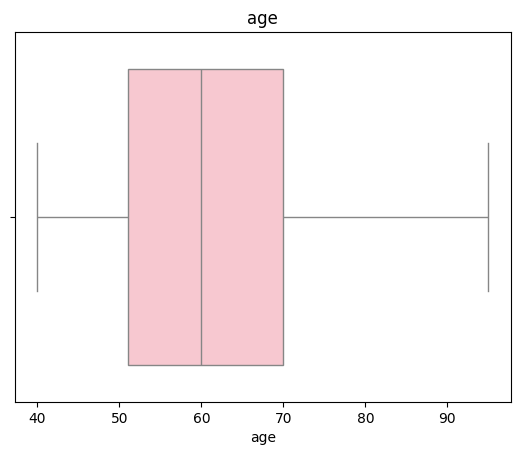

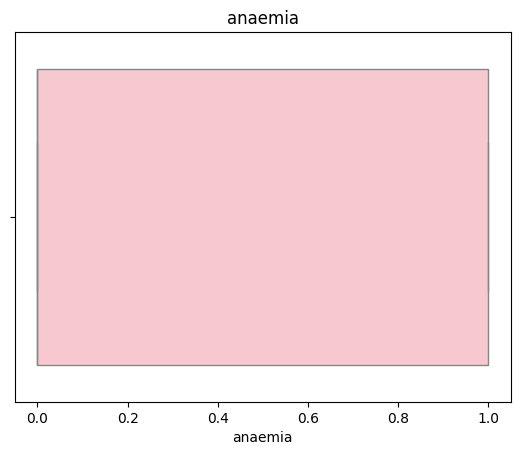

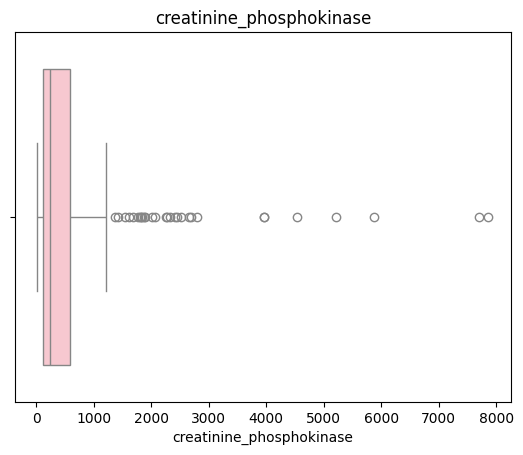

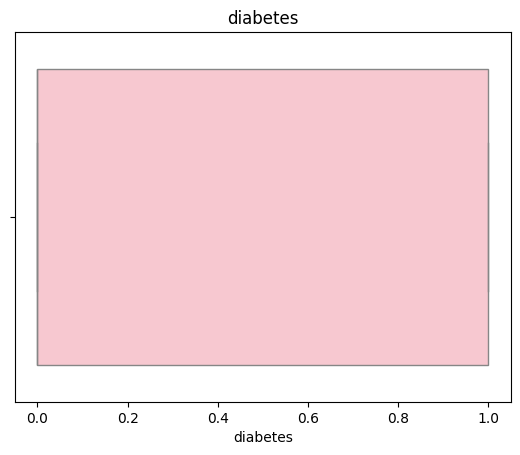

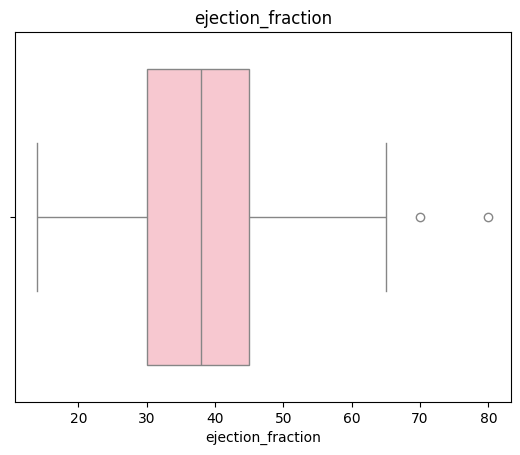

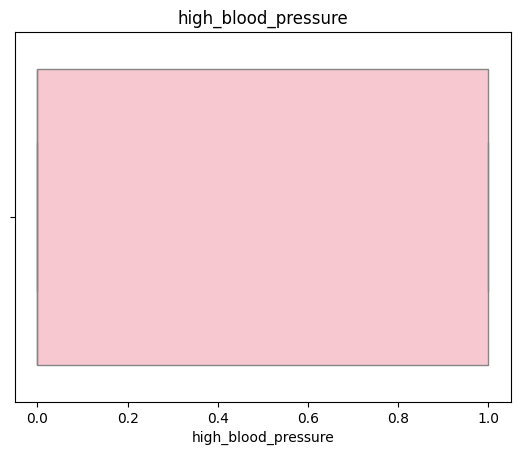

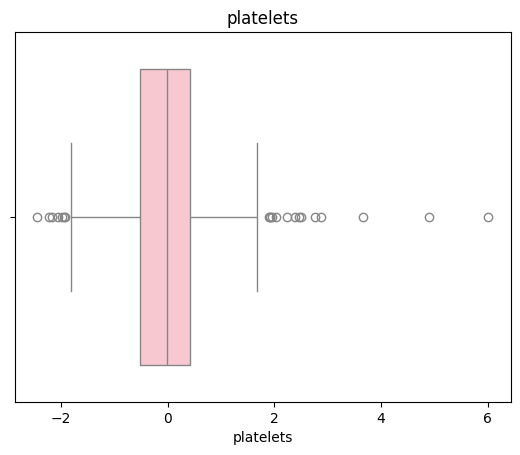

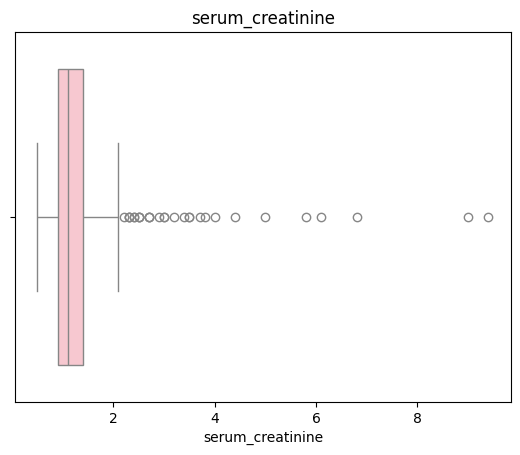

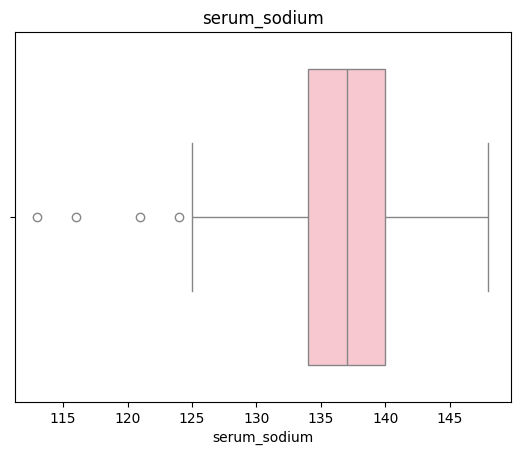

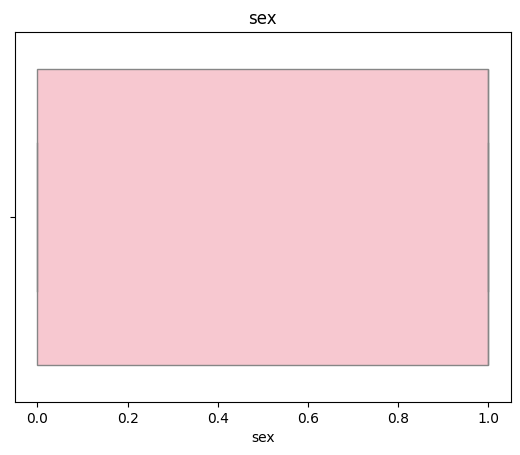

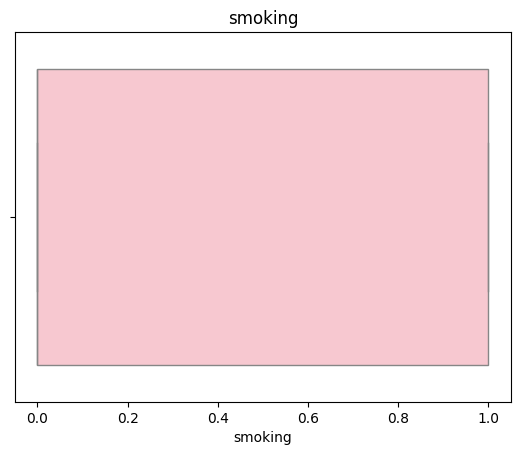

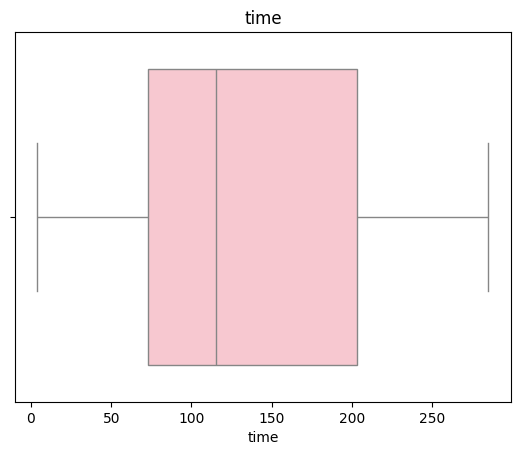

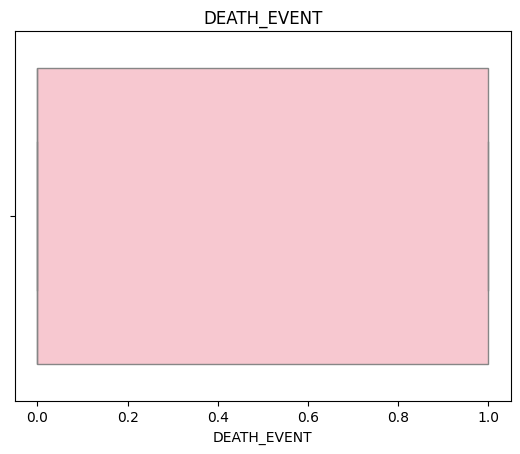

In [ ]:
import seaborn as sns

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=df, x=col, color='pink')
    plt.title(col)
    plt.show()


In [ ]:
target_count = df['DEATH_EVENT'].value_counts()
target_unique = df['DEATH_EVENT'].unique()

מראה את הפילוג במשתנים באחוזים בין כמה ששרדו ולא שרדו במאגר

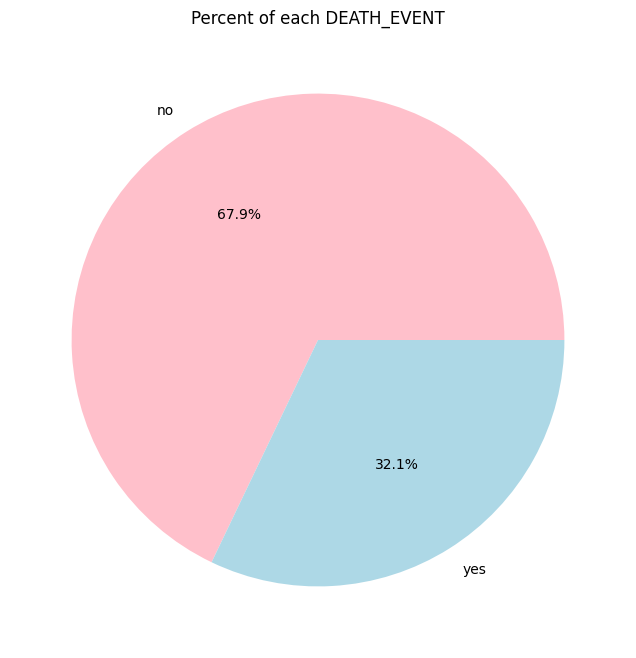

In [ ]:
# Calculate the count of each unique value in the 'DEATH_EVENT' column
death_event_counts = df['DEATH_EVENT'].value_counts()

# Create a mapping for the labels so itll be understandable
label_mapping = {1: 'yes', 0: 'no'}

# Map the original labels to the new labels
mapped_labels = [label_mapping[label] for label in death_event_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=mapped_labels, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Percent of each DEATH_EVENT')
plt.show()

עושה גרפים המשווים בין כל מיני עמודות לעמודת מוות

In [ ]:
data_dead = df[df['DEATH_EVENT'] == 0]
data_survived = df[df['DEATH_EVENT'] == 1]
categorical_feature = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

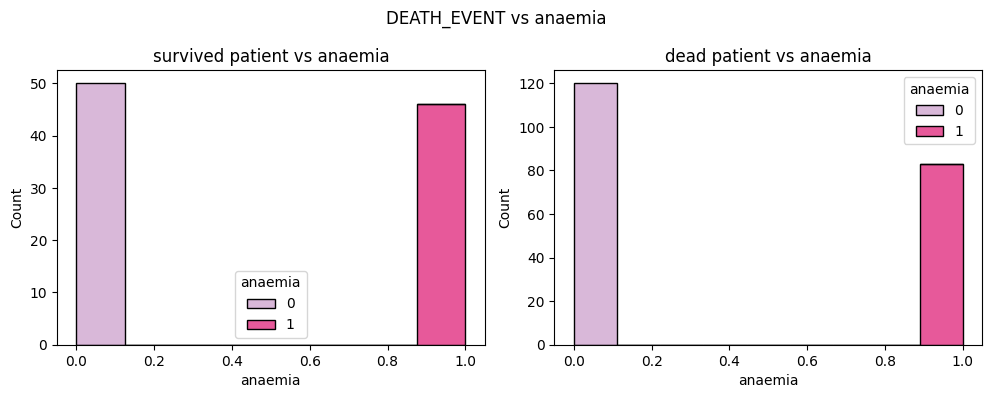

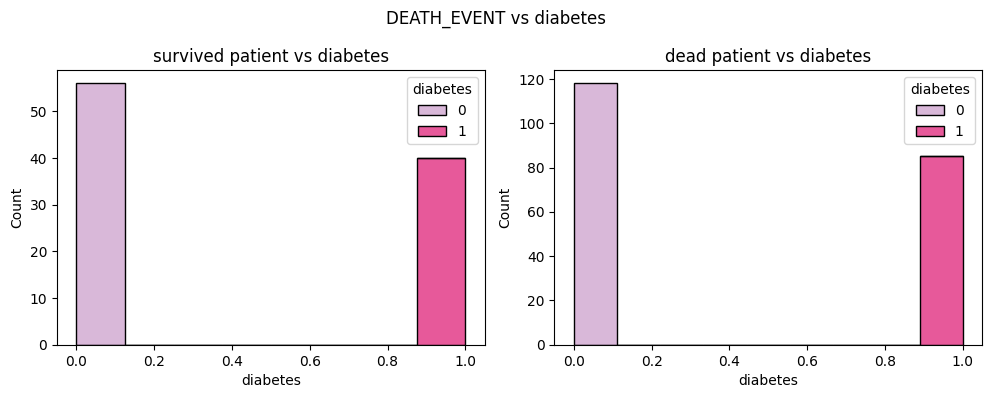

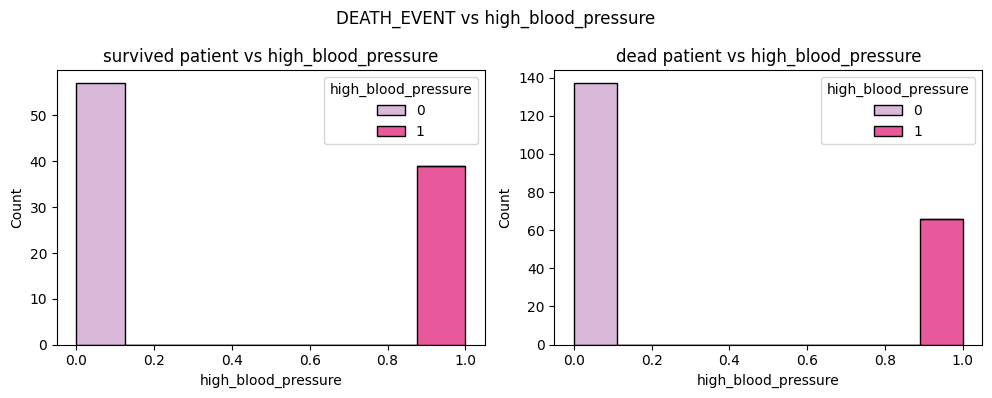

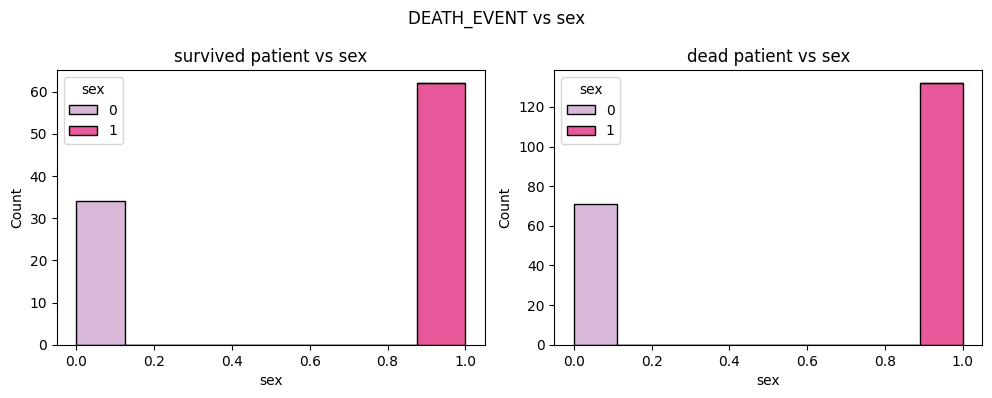

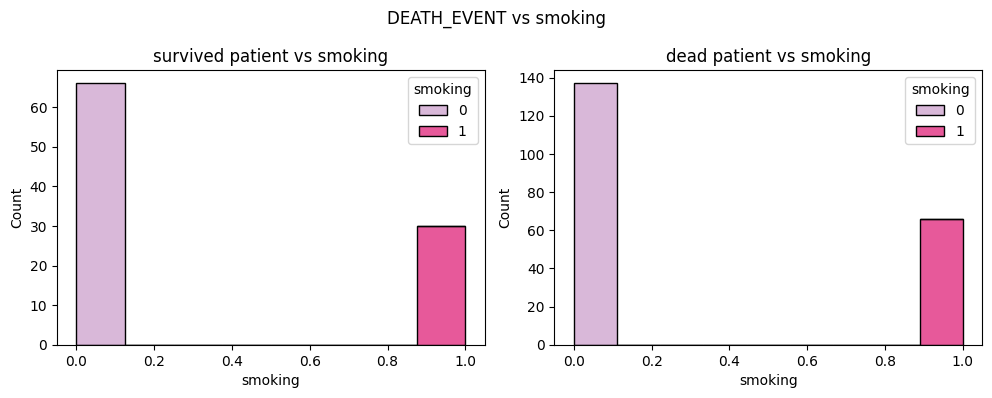

In [ ]:
# Define labels for the two subsets of data
data_event = ['survived patient', 'dead patient']

# Iterate over each categorical feature in the DataFrame
for feature in categorical_feature.columns:

    # Create a figure with two subplots arranged horizontally
    fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

    # Plot stacked histogram for 'survived patient' subset
    sns.histplot(data=data_survived, x=data_survived[feature], hue=data_survived[feature], palette='PuRd', ax=axes[0], multiple='stack')

    # Set title for the first subplot
    axes[0].set_title(f'{data_event[0]} vs {feature}')

    # Plot stacked histogram for 'died patient' subset
    sns.histplot(data=data_dead, x=data_dead[feature], hue=data_dead[feature], palette='PuRd', ax=axes[1], multiple='stack')

    # Set title for the second subplot
    axes[1].set_title(f'{data_event[1]} vs {feature}')

    # Set title for the entire figure
    fig.suptitle(f'DEATH_EVENT vs {feature}')

    # Adjust layout of subplots to prevent overlap
    plt.tight_layout(pad=1)

    # Display the figure with histograms
    plt.show()


# dealing with insufficient data

# למידת מכונה

In [ ]:
#  עמודה לא רלוונטית לכרגע כיוון שיש לי את הגילאים עצמם
df = df.drop(columns=['age_group'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 43) #משתמש ב20% לאימון ושומא על זה שיהיה אותו seed כדי שכל פעם שאני יריץ זה לא ישתנה

בודק באיזה מודל הכי כדאי להשתמש

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=-1,ignore_warnings=True)

In [ ]:
from imblearn.over_sampling import SMOTE #SMOTE stands for Synthetic Minority Over-sampling Technique, a method used to address class imbalance in datasets by generating synthetic samples for the minority class.

smote = SMOTE(random_state=42) #setting a random_state ensures that the same random numbers are generated each time the code is run
X_smote, y_smote = smote.fit_resample(X, y)
''' applies the SMOTE algorithm to the feature matrix X and the target vector y.
The fit_resample method generates synthetic samples for the minority class, resulting in a balanced dataset.
The resampled feature matrix is stored in X_smote, and the resampled target vector is stored in y_smote.'''
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_smote,y_smote,test_size=0.2,random_state=43)
''' This line splits the resampled dataset into training and testing sets. The train_test_split function from scikit-learn is used here.
The test_size=0.2 parameter indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training.
The random_state=43 parameter ensures that the split is reproducible.'''

y_smote.value_counts()

models_s,predicton_s = clf.fit(X_train_s,X_test_s,y_train_s,y_test_s)
models_s

100%|██████████| 29/29 [00:03<00:00,  9.09it/s]

[LightGBM] [Info] Number of positive: 157, number of negative: 167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484568 -> initscore=-0.061748
[LightGBM] [Info] Start training from score -0.061748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.90,0.89,0.89,0.90,0.14
XGBClassifier,0.90,0.89,0.89,0.90,0.75
RandomForestClassifier,0.90,0.89,0.89,0.90,0.41
ExtraTreesClassifier,0.89,0.88,0.88,0.89,0.34
AdaBoostClassifier,0.87,0.86,0.86,0.87,0.27
LinearSVC,0.85,0.85,0.85,0.85,0.08
CalibratedClassifierCV,0.85,0.85,0.85,0.85,0.27
PassiveAggressiveClassifier,0.85,0.85,0.85,0.85,0.03
LogisticRegression,0.84,0.84,0.84,0.84,0.05


In [ ]:
clf = LazyClassifier(verbose=-1,ignore_warnings=True)

models,prediction = clf.fit(X_train_s ,X_test_s,y_train_s ,y_test_s)
models

100%|██████████| 29/29 [00:02<00:00, 12.59it/s]

[LightGBM] [Info] Number of positive: 157, number of negative: 167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484568 -> initscore=-0.061748
[LightGBM] [Info] Start training from score -0.061748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.90,0.89,0.89,0.90,0.12
XGBClassifier,0.90,0.89,0.89,0.90,0.12
RandomForestClassifier,0.90,0.89,0.89,0.90,0.52
ExtraTreesClassifier,0.89,0.88,0.88,0.89,0.25
AdaBoostClassifier,0.87,0.86,0.86,0.87,0.28
LinearSVC,0.85,0.85,0.85,0.85,0.05
CalibratedClassifierCV,0.85,0.85,0.85,0.85,0.15
PassiveAggressiveClassifier,0.85,0.85,0.85,0.85,0.03
LogisticRegression,0.84,0.84,0.84,0.84,0.03


In [ ]:
#לעשות להכל scaling כלומר שהממוצע יהיה 0 והstandard diviation יהיה 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train_s)
X_test = sc.transform(X_test_s)

# LGBMClassifier

מודל מספריית LightGBM המשמש למשימות סיווג. LightGBM (Light Gradient Boosting Machine) היא מסגרת להגברת גרדיאנט יעילה ובעלת ביצועים גבוהים המשתמשת בעצי החלטה. הוא ידוע במהירות שלו, ביכולת להתמודד עם מערכי נתונים גדולים ושימוש יעיל בזיכרון.
בחרתי להשתמש בו כיוון שהוא הראה לאחר הsmote בשימוש בספרייה lazyclassifier שזה יהיה המודל עם אחוזי ההצלחה הטובים ביותר.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

clf = LGBMClassifier(random_state=42)
clf.fit(X_train_s, y_train_s)

# Make predictions on the test set
y_pred_s = clf.predict(X_test_s)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_s, y_pred_s))
print("Classification Report:\n", classification_report(y_test_s, y_pred_s))

[LightGBM] [Info] Number of positive: 157, number of negative: 167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484568 -> initscore=-0.061748
[LightGBM] [Info] Start training from score -0.061748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

# KNN

למודל הזה לא היו את התוצאות הכי טובות אך בחרתי להשאיר אותו להדגים שלא תמיד מה שנראה לנו המודל הכי "קל" תמיד יתאים לנתונים שלנו

19


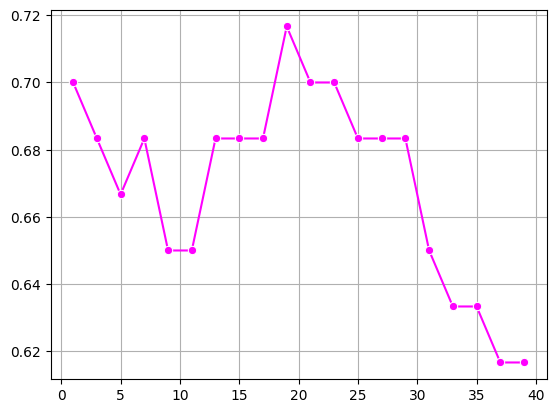

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 40, 2)
accuracies = []

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 43)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)


sns.lineplot(x=k_values, y=accuracies, marker='o', color = 'magenta')

plt.grid(True)

best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]

print(best_k)


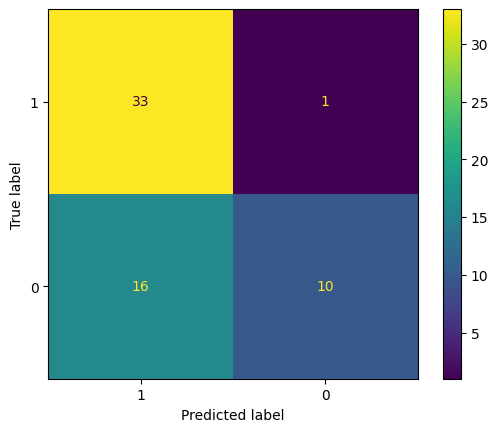

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=best_k) #שיצא לנו 3
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

classes = df['DEATH_EVENT'].unique()

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.97      0.80        34
           1       0.91      0.38      0.54        26

    accuracy                           0.72        60
   macro avg       0.79      0.68      0.67        60
weighted avg       0.78      0.72      0.68        60



# ridgeclassifier

Ridge Classifier:
אלגוריתם שהשימוש שלו הוא כדי למנוע מצבים של overfitting
הוא משתמש במפסיק התאמה יתר על ידי הוספת מונח ענישה המנוהל על ידי ההיפרפרמטר אלפא. הסדרה זו מסייעת בשימור שיווי המשקל בין ניהול מורכבות המודל והתאמת הנתונים.
בחרתי להשתמש בו כיוון שלפני שעשיתי את הsmote זה היה המודל עם אחוזי ההצלחה הטובים ביותר ורציתי להשוות לראות איך המודלים הטובים ביותר יושוו לפני ואחרי העבודה עם הנתונים.

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'alpha': uniform(loc=0, scale=100),  # Sampling alpha from a uniform distribution between 0 and 100
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

ridge = RidgeClassifier()

random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.4f}")

best_ridge = random_search.best_estimator_
test_score = best_ridge.score(X_test, y_test)
print(f"Test score: {test_score:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'alpha': 37.454011884736246, 'solver': 'sag'}
Best score: 0.8451
Test score: 0.8000


# logistic regression

המודל של רגרסיה לוגיסטית פועל בכך שהוא יוצר פונקציה מתמטית אשר מחשבת את הסיכוי שכל נתון חדש סיווגו יהיה אמת או שקר.
בחרתי במודל זה ולא בlinear regression  כיוון וlogistic regression מתאים יותר עבור מודל של סיווג בעוד וlinear regression מתאים יותר עבור מודל אשר מחשב את תוצאתו.
תחילה השתמשתי ב GridSearchCV (פונקציה מתוך הספרייה SKLEARN)כדי למצוא את ההיפר פרמטרים הכי טובים עבור המודל.


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression(max_iter=10000)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': [None, 0.5]
}


grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 0.01, 'l1_ratio': None, 'penalty': 'l1', 'solver': 'saga'}


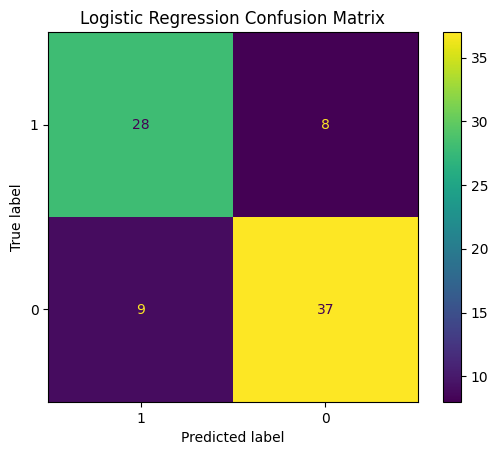

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lgrc = LogisticRegression(C=0.01, l1_ratio=None, penalty='l2', solver='liblinear')
lgrc.fit(X_train_s, y_train_s)


y_pred_lgrc = lgrc.predict(X_test_s)

cm = confusion_matrix(y_test_s, y_pred_lgrc)

classes = y.unique()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_s, y_pred_lgrc))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.82      0.80      0.81        46

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



# סיכום ורפלקציה



אני משערת שהביצועים שלי לא היו מיטביים כיוון שהנתונים עצמם באו ממאגר קטן מידי אשר לא נתן מספיק נתונים גם לאימון וגם לבדיקה שלא יווצר מצב של over\underfitting. ניסיתי לטפל זאת בעזרת שיטה שמצאתי באינטרנת הנקראת smote.
למדתי שגם אם אין מספיק נתונים תמיד ישנם דרכים שונות להתמודד איתם והיו לי המון אתגרים עם מציאת מאגר נתונים מספיק טוב ועם מציאת מודלים שיציאו תוצאות מספקות. למדתי על כל מיני ספריות שלא הכרתי לפני כן וגם על מודלים שהיו חדשים לי.
אך למרות כל הבעיות שהיו לי עם הנתונים הצלחתי להגיע לאחוזי דיוק של מעל70% בכל המודלים שבהם השתמשתי, שזה לדעתי עדיין הישג ראוי להערכה אם כי היו לי רק סביב ה300 שורות להתמך אליהן.